In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
image_path = "1.jpeg"
IMG_width, IMG_height = 256, 256



In [ ]:
image = cv2.imread(image_path)
image = cv2.resize(image, (IMG_width, IMG_height))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [9]:
def random_flip(img):
    """Randomly flips an image horizontally."""
    if random.random() > 0.5:
        return cv2.flip(img, 1)  # flipCode=1 means horizontal flip
    return img



def random_rotate(img):
    """Rotates an image by a random angle between -30 and 30 degrees."""
    angle = random.uniform(-30, 30)
    h, w = img.shape[:2]
    center = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(
        img, M, (w, h),
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(255, 255, 255)  # white background
    )
    return rotated



def color_jitter(img):
    """Randomly changes brightness, contrast, and saturation."""
    # Convert to HSV for saturation
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)

    # Brightness (value channel)
    brightness = random.uniform(0.7, 1.3)
    hsv[..., 2] = np.clip(hsv[..., 2] * brightness, 0, 255)

    # Saturation
    saturation = random.uniform(0.7, 1.3)
    hsv[..., 1] = np.clip(hsv[..., 1] * saturation, 0, 255)

    img = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

    # Contrast (done in RGB)
    contrast = random.uniform(0.7, 1.3)
    img = np.clip(127 + contrast * (img - 127), 0, 255).astype(np.uint8)

    return img



def random_zoom(img, zoom_factor=0.2):
    """Zooms into a random part of the image."""
    h, w = img.shape[:2]
    zoom_h = int(h * (1 - zoom_factor))
    zoom_w = int(w * (1 - zoom_factor))

    top = random.randint(0, h - zoom_h)
    left = random.randint(0, w - zoom_w)
    cropped = img[top:top+zoom_h, left:left+zoom_w]

    return cv2.resize(cropped, (w, h))

(-0.5, 255.5, 255.5, -0.5)

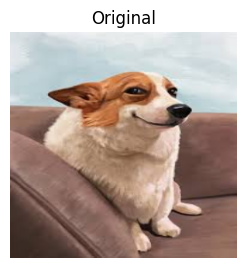

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

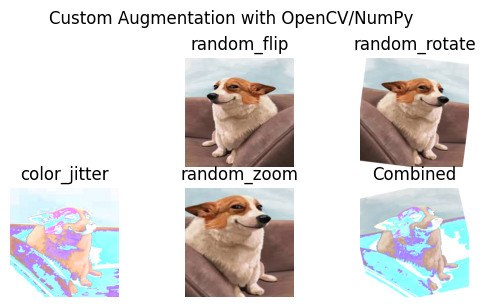

In [13]:
augmentations = [random_flip, random_rotate, color_jitter, random_zoom]
for i, aug_func in enumerate(augmentations):
    augmented_image = aug_func(image.copy())
    plt.subplot(3, 3, i + 2)
    plt.imshow(augmented_image)
    plt.title(aug_func.__name__)
    plt.axis("off")

combined_img = random_rotate(color_jitter(random_flip(image.copy())))
plt.subplot(3, 3, 6)
plt.imshow(combined_img)
plt.title("Combined")
plt.axis("off")

plt.suptitle("Custom Augmentation with OpenCV/NumPy")
plt.show()
